In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [57]:
df = pd.read_csv('datos_seguro.csv')
df.head()

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [58]:
df.describe()

,edad,compra
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


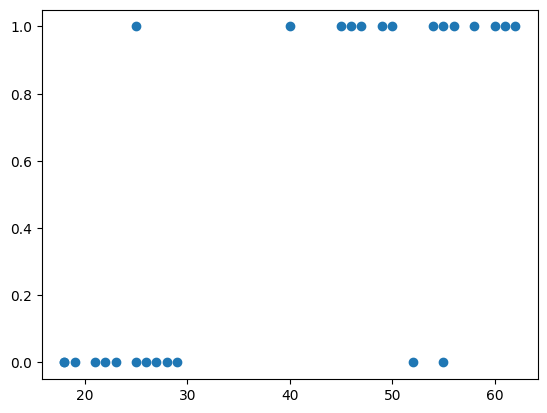

In [59]:
plt.scatter(df['edad'], df['compra'])

In [60]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(df[['edad']], df['compra'], test_size=0.2)

In [61]:
X_entrena

,edad
16,25
6,55
26,23
19,18
10,18
17,58
9,61
0,22
13,29
21,26


In [62]:
X_prueba

,edad
1,25
4,46
11,28
3,52
15,55
7,60


In [63]:
modelo = LogisticRegression()
modelo.fit(X_entrena, y_entrena)


LogisticRegression()

In [64]:
modelo.score(X_prueba, y_prueba)

0.8333333333333334

In [65]:
datos_nuevos = pd.DataFrame({'edad': [20,25,30,35,40,45,50,55,60,65]})
datos_nuevos.head()

,edad
0,20
1,25
2,30
3,35
4,40


In [66]:
probabilidades = modelo.predict_proba(datos_nuevos)
probabilidades

array([[0.91604501, 0.08395499],
       [0.84077054, 0.15922946],
       [0.71872788, 0.28127212],
       [0.55288839, 0.44711161],
       [0.37438175, 0.62561825],
       [0.22456193, 0.77543807],
       [0.12291737, 0.87708263],
       [0.0635124 , 0.9364876 ],
       [0.03177719, 0.96822281],
       [0.01563437, 0.98436563]])

In [67]:
prob_compra = probabilidades[:, 1]
prob_compra

array([0.08395499, 0.15922946, 0.28127212, 0.44711161, 0.62561825,
       0.77543807, 0.87708263, 0.9364876 , 0.96822281, 0.98436563])

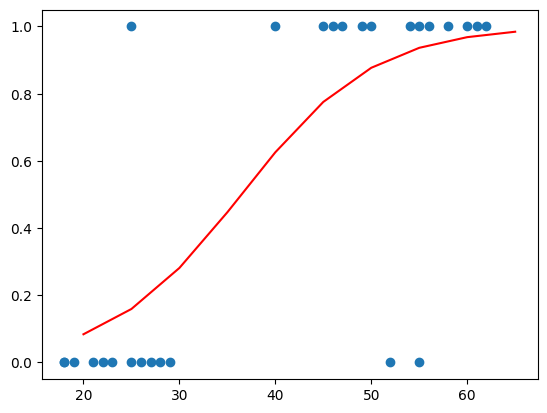

In [69]:
plt.scatter(df['edad'], df['compra'])
plt.plot(datos_nuevos['edad'], prob_compra, color = 'red')